In [55]:
# Importación de librerías necesarias
# -----------------------------------------------------------------------

# Tratamiento de datos
import pandas as pd
import numpy as np 
# -----------------------------------------------------------------------

# Imputación de nulos usando métodos avanzados estadísticos
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer
# -----------------------------------------------------------------------

# Visualización y gráficos
import matplotlib.pyplot as plt
import seaborn as sns
# -----------------------------------------------------------------------


# Configuración para visualizar todas las columnas de los DataFrames
pd.set_option('display.max_columns', None)
# -----------------------------------------------------------------------

# Configuración para mejoras de la visualización
from IPython.display import display
# -----------------------------------------------------------------------

# Gestión de warnings
import warnings
warnings.filterwarnings("ignore")
# -----------------------------------------------------------------------

# Importación de DataFrames
df = pd.read_csv("Sleep_Efficiency.csv")

In [56]:
df.sample(5)

,ID,Age,Gender,Bedtime,Wakeup time,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Smoking status,Exercise frequency
87,88,50,Male,2021-04-14 00:00:00,2021-04-14 07:00:00,7.0,0.71,26,58,16,3.0,0.0,3.0,No,0.0
258,259,54,Male,2021-10-21 22:00:00,2021-10-21 06:00:00,8.0,0.61,18,35,47,1.0,0.0,0.0,Yes,3.0
199,200,52,Male,2021-08-19 22:30:00,2021-08-19 05:30:00,7.0,0.83,23,57,20,1.0,0.0,0.0,Yes,0.0
208,209,32,Female,2021-03-22 22:00:00,2021-03-22 06:00:00,8.0,0.88,22,65,13,1.0,0.0,0.0,No,2.0
416,417,49,Female,2021-01-04 22:00:00,2021-01-04 05:00:00,7.0,0.87,25,55,20,0.0,0.0,0.0,No,5.0


In [74]:
df.head(5)

,ID,Age,Gender,Bedtime,Wakeup time,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Smoking status,Exercise frequency
0,1,65,Female,2021-03-06 01:00:00,2021-03-06 07:00:00,6.0,0.88,18,70,12,0.0,0.0,0.0000,Yes,3.0
1,2,69,Male,2021-12-05 02:00:00,2021-12-05 09:00:00,7.0,0.66,19,28,53,3.0,0.0,88.7205,Yes,3.0
2,3,40,Female,2021-05-25 21:30:00,2021-05-25 05:30:00,8.0,0.89,20,70,10,1.0,0.0,0.0000,No,3.0
3,4,40,Female,2021-11-03 02:30:00,2021-11-03 08:30:00,6.0,0.51,23,25,52,3.0,50.0,147.8675,Yes,1.0
4,5,57,Male,2021-03-13 01:00:00,2021-03-13 09:00:00,8.0,0.76,27,55,18,3.0,0.0,88.7205,No,3.0


In [58]:
df['Alcohol consumption'].unique()

array([ 0.,  3.,  5.,  1.,  2., nan,  4.])

In [59]:
df['Alcohol consumption'] = df['Alcohol consumption'] * 29.5735
df['Alcohol consumption']

0        0.0000
1       88.7205
2        0.0000
3      147.8675
4       88.7205
         ...   
447      0.0000
448      0.0000
449     88.7205
450      0.0000
451      0.0000
Name: Alcohol consumption, Length: 452, dtype: float64

In [60]:
df.shape

(452, 15)

In [61]:
df.duplicated().sum()

0

In [62]:
df.columns

Index(['ID', 'Age', 'Gender', 'Bedtime', 'Wakeup time', 'Sleep duration',
       'Sleep efficiency', 'REM sleep percentage', 'Deep sleep percentage',
       'Light sleep percentage', 'Awakenings', 'Caffeine consumption',
       'Alcohol consumption', 'Smoking status', 'Exercise frequency'],
      dtype='object')

In [63]:
df.nunique().sort_values(ascending=False)

ID                        452
Wakeup time               434
Bedtime                   424
Age                        61
Sleep efficiency           50
Deep sleep percentage      29
Light sleep percentage     29
REM sleep percentage       13
Sleep duration              9
Caffeine consumption        6
Alcohol consumption         6
Exercise frequency          6
Awakenings                  5
Gender                      2
Smoking status              2
dtype: int64

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452 entries, 0 to 451
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID                      452 non-null    int64  
 1   Age                     452 non-null    int64  
 2   Gender                  452 non-null    object 
 3   Bedtime                 452 non-null    object 
 4   Wakeup time             452 non-null    object 
 5   Sleep duration          452 non-null    float64
 6   Sleep efficiency        452 non-null    float64
 7   REM sleep percentage    452 non-null    int64  
 8   Deep sleep percentage   452 non-null    int64  
 9   Light sleep percentage  452 non-null    int64  
 10  Awakenings              432 non-null    float64
 11  Caffeine consumption    427 non-null    float64
 12  Alcohol consumption     438 non-null    float64
 13  Smoking status          452 non-null    object 
 14  Exercise frequency      446 non-null    fl

In [65]:
nulls = df.isnull().sum()
nulls.sort_values(ascending=False)

Caffeine consumption      25
Awakenings                20
Alcohol consumption       14
Exercise frequency         6
ID                         0
Age                        0
Gender                     0
Bedtime                    0
Wakeup time                0
Sleep duration             0
Sleep efficiency           0
REM sleep percentage       0
Deep sleep percentage      0
Light sleep percentage     0
Smoking status             0
dtype: int64

In [66]:
nulls_percentage = nulls/df.shape[0]*100 # transformamos los nulos a porcentajes de nulos

In [67]:
columns_with_null = ['Caffeine consumption', 'Awakenings', 'Alcohol consumption', 'Exercise frequency']

for i in columns_with_null:
    print(f'La columna "{i}" es de tipo: {df.dtypes[i]}')
    print(f'Su número de nulos es {nulls[i]}.')
    print(f'Su porcentaje de nulos es {nulls_percentage[i]}')
    print('--------------------------------------------------------')

La columna "Caffeine consumption" es de tipo: float64
Su número de nulos es 25.
Su porcentaje de nulos es 5.530973451327434
--------------------------------------------------------
La columna "Awakenings" es de tipo: float64
Su número de nulos es 20.
Su porcentaje de nulos es 4.424778761061947
--------------------------------------------------------
La columna "Alcohol consumption" es de tipo: float64
Su número de nulos es 14.
Su porcentaje de nulos es 3.0973451327433628
--------------------------------------------------------
La columna "Exercise frequency" es de tipo: float64
Su número de nulos es 6.
Su porcentaje de nulos es 1.3274336283185841
--------------------------------------------------------


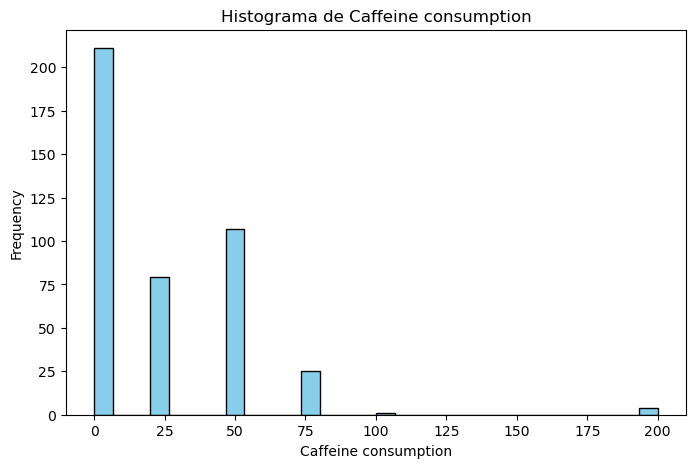

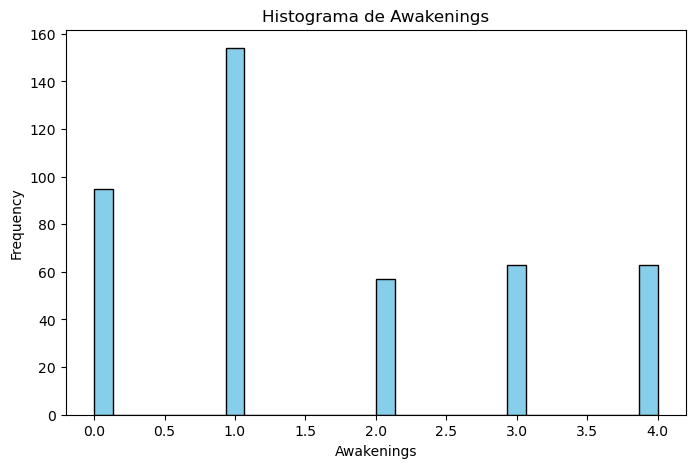

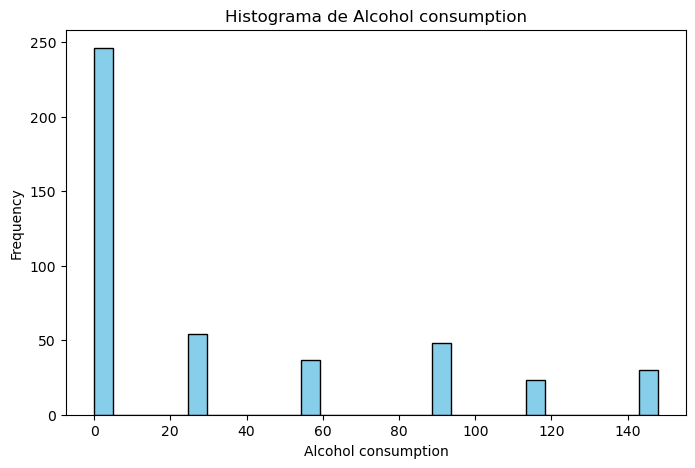

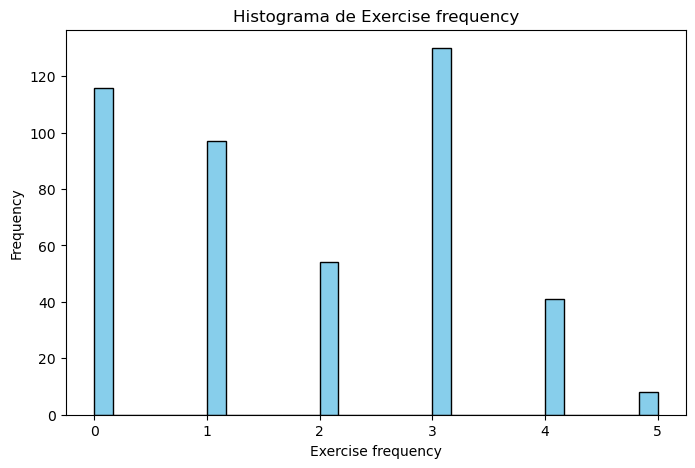

In [68]:
# => las 4 columnas tienen un bajo porcentaje de nulos => evaluamos su distribución:
for col in list(columns_with_null):
    plt.figure(figsize=(8, 5))
    plt.hist(df[col].dropna(), bins=30, color='skyblue', edgecolor='black')
    plt.title(f'Histograma de {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

In [69]:
# como las 4 columnas tienen un % bajo de nulos (columnas de tipo numérico) y su distribución es asimétrica => sustituimos los nulos por la mediana:
median_caffeine = df['Caffeine consumption'].median()
df['Caffeine consumption'] = df['Caffeine consumption'].fillna(median_caffeine)

median_awakenings = df['Awakenings'].median()
df['Awakenings'] = df['Awakenings'].fillna(median_awakenings)

median_alcohol = df['Alcohol consumption'].median()
df['Alcohol consumption'] = df['Alcohol consumption'].fillna(median_alcohol)

median_exercise = df['Exercise frequency'].median()
df['Exercise frequency'] = df['Exercise frequency'].fillna(median_exercise)

In [72]:
# comprobamos que ya no hay nulos:
df.isnull().sum()

ID                        0
Age                       0
Gender                    0
Bedtime                   0
Wakeup time               0
Sleep duration            0
Sleep efficiency          0
REM sleep percentage      0
Deep sleep percentage     0
Light sleep percentage    0
Awakenings                0
Caffeine consumption      0
Alcohol consumption       0
Smoking status            0
Exercise frequency        0
dtype: int64

In [73]:
df.to_csv('project_sleep_efficiency.csv', index=False)